In [1]:
#import all required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
# upload the data set
iris_data =  pd.read_csv("C:/Users/Asus/Downloads/archive (4)/Iris.csv", header=0)

In [3]:
iris_data.info()
print("**"*50)
iris_data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
****************************************************************************************************


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# select x and y lables
X = iris_data.loc[:, iris_data.columns != 'Species']
Y = iris_data.loc[:,['Species']]

In [5]:
Y_enc = LabelEncoder().fit_transform(Y)
Y_label = tf.keras.utils.to_categorical(Y_enc)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_label, test_size=0.3)

In [7]:
print(f"Train shape : {X_train.shape}, Y Train : {Y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 5), Y Train : (105, 3)
(5,)


In [8]:
def get_model():
    model= Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(300,activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3,activation='softmax')
    ])
    
    return model

In [9]:
model=get_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              6000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 657,703
Trainable params: 657,703
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
             loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [12]:
history= model.fit(X_train,Y_train, epochs=500, validation_data= (X_test,Y_test), verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 74ms/step - loss: 4.0804 - accuracy: 0.2571 - val_loss: 4.4600 - val_accuracy: 0.3333
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 3.6681 - accuracy: 0.3524 - val_loss: 1.7402 - val_accuracy: 0.5778
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 1.9649 - accuracy: 0.4571 - val_loss: 1.3271 - val_accuracy: 0.4889
Epoch 4/500
4/4 [==============================] - 0s 14ms/step - loss: 1.6577 - accuracy: 0.4476 - val_loss: 0.9429 - val_accuracy: 0.5111
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 1.1002 - accuracy: 0.5238 - val_loss: 0.6247 - val_accuracy: 0.7111
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8913 - accuracy: 0.6286 - val_loss: 0.7056 - val_accuracy: 0.6000
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8629 - accuracy: 0.6190 - val_loss: 0.4617 - val_accuracy: 0.8000
Epoch 8/500
4/4 [=======

In [13]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.0027 - accuracy: 1.0000


[0.0026766664814203978, 1.0]

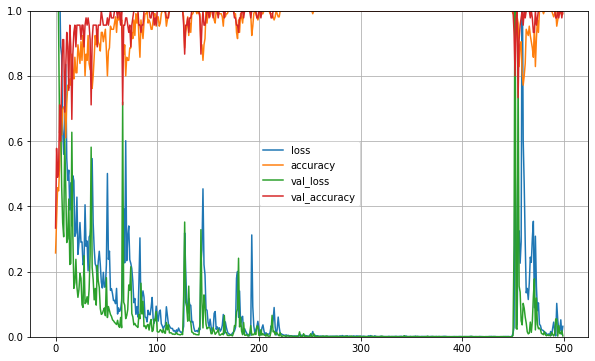

In [14]:
# visualise 
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
new_data, Y_actual = X_test[:3],Y_test[:3]
Y_proba = model.predict(new_data)
print(f"Actual data : {Y_actual}")
for pred in Y_proba:
    print(np.argmax(pred))

Actual data : [[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
2
1
2
